In [160]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('soil.h5')

In [161]:
import requests
import os
import re
import cv2
import time
import shutil
import zipfile
import urllib.request
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
from random import randrange
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [162]:
def classify_images(image_fp, model):
    classes = ['Gravel', 'Sand', 'Silt']
    gravel_count = 0
    sand_count = 0
    silt_count = 0

    img = cv2.imread(image_fp)
    img = cv2.resize(img,(1024,1024))
    im_dim = 256

    for r in range(0, img.shape[0], im_dim):
        for c in range(0, img.shape[1], im_dim):
            cropped_img = img[r:r + im_dim, c:c + im_dim, :]
            h, w, c = cropped_img.shape
            if h == im_dim and w == im_dim:
                classification = model_classify(cropped_img, model)
                if classification == classes[0]:
                    gravel_count += 1
                elif classification == classes[1]:
                    sand_count += 1
                elif classification == classes[2]:
                    silt_count += 1
            else:
                continue
    total_count = gravel_count + sand_count + silt_count
    proportion_array = [gravel_count / total_count, sand_count / total_count, silt_count / total_count]
    return proportion_array


def model_classify(cropped_img, model):
    classes = ['Gravel', 'Sand', 'Silt']
    image_array = cropped_img / 255.
    img_batch = np.expand_dims(image_array, axis=0)
    prediction_array = model.predict(img_batch)[0]
    first_idx = np.argmax(prediction_array)
    first_class = classes[first_idx]
    return first_class

# def classify_percentage(image_fp):
#     start = time.time()
#     out = classify_images(image_fp=image_fp, model=model)
#     finish = str(round(time.time() - start, 5))
    
#     im = cv2.imread(image_fp) # load image
#     plt.imshow(im[:,:,[2, 1, 0]])

#     print(f'''---
# Percent Gravel: {round(out[0] * 100, 2)}%)
# Percent Sand: {round(out[1] * 100, 2)}%)
# Percent Silt: {round(out[2] * 100, 2)}%)
# Time to Classify: {finish} seconds
# ---''')

def classify_percentage(image_url):
    local_image_path = 'image.jpg'  # Path to save the downloaded image
    downloaded_image_path = download_image(image_url, local_image_path)
    if downloaded_image_path:
        start = time.time()
        out = classify_images(image_fp=downloaded_image_path, model=model)
        finish = str(round(time.time() - start, 5))

        im = cv2.imread(downloaded_image_path)  # Load downloaded image
        plt.imshow(im[:, :, [2, 1, 0]])

#         print(f'''---
# Percent Gravel: {round(out[0] * 100, 2)}%)
# Percent Sand: {round(out[1] * 100, 2)}%)
# Percent Silt: {round(out[2] * 100, 2)}%)
# Time to Classify: {finish} seconds
# ---''')
        
        text_output = f'Percent Gravel: {round(out[0] * 100, 2)}%, Percent Sand: {round(out[1] * 100, 2)}%, Percent Silt: {round(out[2] * 100, 2)}%'
        
        print(text_output)

    else:
        print("Failed to download the image.")

# Define the download_image function
def download_image(image_url, save_path):
    response = requests.get(image_url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        return save_path
    else:
        return None

1/1 [==============================] - 0s 34ms/step
Percent Gravel: 0.0%, Percent Sand: 6.25%, Percent Silt: 93.75%


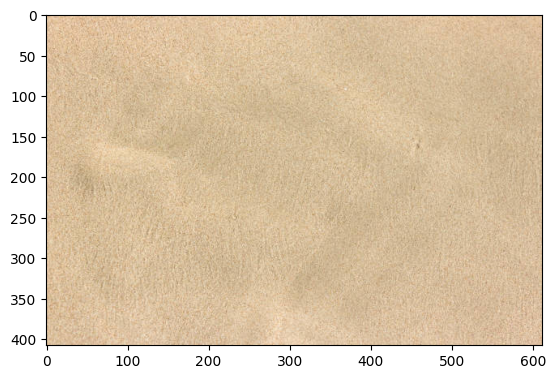

In [163]:
# test_data_directory = 'test'
# percentage_photo = test_data_directory + r"/Silt/5.jpg"

# silt
percentage_photo = 'https://media.istockphoto.com/id/950553642/photo/clear-wet-sands-beach-texture-background.jpg?s=612x612&w=0&k=20&c=VHzmJEKNL2QslrPh1xyNM8iNTxQDEGLq8iit0VN70c4='

# gravel
# percentage_photo = 'https://www.housedigest.com/img/gallery/what-are-the-different-types-of-gravel-to-consider/intro-1651672116.jpg'

# sand
# percentage_photo = 'https://www.investopedia.com/thmb/5OehRQwneiZA0LY7O7PMDwv_gDA=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/sand-texture-in-the-beach-917396446-a71407b27e164c53a7bf0a89510074d4.jpg'

# percentage_photo = 'https://www.whiz-q.com/mm5/graphics/00000001/80138YARD.jpg'

classify_percentage(image_url=percentage_photo)